# Projekat 2 - nenadgledano učenje

**Dataset**: https://www.kaggle.com/datasets/arslanali4343/top-personality-dataset

**Definicija problema**: Klasterizacija osoba po tipovima ličnosti.

**Vrsta problema**: klasterizacija

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

sns.set(style="darkgrid")

personality_data = pd.read_csv("dataset/2018-personality-data.csv", sep=',')

personality_data.head(10)

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,...,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,...,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3
5,f91b2fb085d0feb47b86fc81b10207ee,6.0,3.0,4.0,3.5,1.5,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,4
6,f7b0502be8c86203ce6acaffe59f993a,4.5,4.0,6.0,5.0,4.0,diversity,low,1289,4.221673,...,1248,4.164153,1212,4.153351,2360,4.206983,5291,4.157934,3,4
7,36f31ef9879b4de96977aeba94878581,5.5,4.5,6.0,3.0,4.0,popularity,low,109243,4.300146,...,116897,4.101134,117444,4.138054,117192,4.164289,117533,4.231472,4,4
8,653bb2f69ddd19e1cf1f9e1871916d71,5.0,5.0,5.0,5.0,3.0,diversity,high,91658,5.021285,...,1035,4.710799,104241,4.587644,30749,4.870536,4886,4.622648,3,4
9,89d365a0d0f1a80ae8d079079a078155,6.0,6.5,2.0,2.5,3.0,diversity,high,91658,5.021285,...,1035,4.710799,104241,4.587644,30749,4.870536,4886,4.622648,3,2


In [3]:
personality_data = personality_data.rename(columns={' openness' : 'openness',
                ' agreeableness' : 'agreeableness',
                ' emotional_stability' : 'emotional_stability',
                ' conscientiousness' : 'conscientiousness',
                ' extraversion' : 'extraversion',
                ' assigned metric' : 'assigned metric',
                ' assigned condition' : 'assigned condition',
                ' movie_1' : 'movie_1',
                ' movie_2' : 'movie_2',  
                ' movie_3' : 'movie_3',  
                ' movie_4' : 'movie_4',  
                ' movie_5' : 'movie_5',  
                ' movie_6' : 'movie_6',  
                ' movie_7' : 'movie_7',  
                ' movie_8' : 'movie_8',  
                ' movie_9' : 'movie_9',  
                ' movie_10' : 'movie_10',
                ' movie_11' : 'movie_11',      
                ' movie_12' : 'movie_12',
                ' predicted_rating_1' : 'predicted_rating_1',
                ' predicted_rating_2' : 'predicted_rating_2',
                ' predicted_rating_3' : 'predicted_rating_3',
                ' predicted_rating_4' : 'predicted_rating_4',
                ' predicted_rating_5' : 'predicted_rating_5',
                ' predicted_rating_6' : 'predicted_rating_6',
                ' predicted_rating_7' : 'predicted_rating_7',
                ' predicted_rating_8' : 'predicted_rating_8',
                ' predicted_rating_9' : 'predicted_rating_9',
                ' predicted_rating_10' : 'predicted_rating_10',
                ' predicted_rating_11' : 'predicted_rating_11',
                ' predicted_rating_12' : 'predicted_rating_12',
                ' is_personalized' : 'is_personalized',
                ' enjoy_watching ' : 'enjoy_watching'})

In [4]:
print(personality_data['assigned metric'].unique())
print(personality_data['assigned condition'].unique())

[' serendipity' ' all' ' popularity' ' diversity']
[' high' ' default' ' medium' ' low']


In [5]:
personality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   userid               1834 non-null   object 
 1   openness             1834 non-null   float64
 2   agreeableness        1834 non-null   float64
 3   emotional_stability  1834 non-null   float64
 4   conscientiousness    1834 non-null   float64
 5   extraversion         1834 non-null   float64
 6   assigned metric      1834 non-null   object 
 7   assigned condition   1834 non-null   object 
 8   movie_1              1834 non-null   int64  
 9   predicted_rating_1   1834 non-null   float64
 10  movie_2              1834 non-null   int64  
 11  predicted_rating_2   1834 non-null   float64
 12  movie_3              1834 non-null   int64  
 13  predicted_rating_3   1834 non-null   float64
 14  movie_4              1834 non-null   int64  
 15  predicted_rating_4   1834 non-null   f

In [6]:
personality_data.describe()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,movie_1,predicted_rating_1,movie_2,predicted_rating_2,movie_3,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
count,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,...,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000
mean,5.376499,4.215921,4.561614,4.662486,3.485551,45669.233915,4.362927,50656.360414,4.322496,51791.061069,...,39458.009269,4.302993,38493.352236,4.301880,39280.998909,4.300609,38871.924755,4.302449,3.056707,3.517993
std,1.042804,1.137923,1.392548,1.311450,1.468503,46612.744107,0.383549,46669.152356,0.378746,46172.769718,...,44511.776921,0.380281,43444.149855,0.383848,43446.111523,0.378476,43486.579385,0.378439,1.078507,1.059060
min,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,2.510682,1.000000,2.423497,6.000000,...,1.000000,2.483215,1.000000,2.799538,1.000000,2.375510,1.000000,2.313341,1.000000,1.000000
25%,4.500000,3.500000,3.500000,4.000000,2.500000,2019.000000,4.110614,3307.750000,4.084125,3031.250000,...,1766.750000,4.049153,1302.000000,4.059146,1466.000000,4.052558,1256.000000,4.050181,2.000000,3.000000
50%,5.500000,4.000000,4.500000,4.500000,3.500000,17392.000000,4.355815,44377.000000,4.320721,48780.000000,...,7156.000000,4.307194,6964.000000,4.294702,7505.000000,4.299400,7361.000000,4.305078,3.000000,4.000000
75%,6.000000,5.000000,5.500000,5.500000,4.500000,94466.000000,4.618449,96606.000000,4.556173,95311.000000,...,84847.000000,4.545671,81847.000000,4.539686,81845.000000,4.549493,82069.000000,4.550886,4.000000,4.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,140737.000000,6.563889,136445.000000,6.585588,141761.000000,...,140359.000000,6.606617,134853.000000,7.345432,142115.000000,6.530355,139195.000000,6.574597,5.000000,5.000000


In [7]:
personality_data.isnull().sum()

userid                 0
openness               0
agreeableness          0
emotional_stability    0
conscientiousness      0
extraversion           0
assigned metric        0
assigned condition     0
movie_1                0
predicted_rating_1     0
movie_2                0
predicted_rating_2     0
movie_3                0
predicted_rating_3     0
movie_4                0
predicted_rating_4     0
movie_5                0
predicted_rating_5     0
movie_6                0
predicted_rating_6     0
movie_7                0
predicted_rating_7     0
movie_8                0
predicted_rating_8     0
movie_9                0
predicted_rating_9     0
movie_10               0
predicted_rating_10    0
movie_11               0
predicted_rating_11    0
movie_12               0
predicted_rating_12    0
is_personalized        0
enjoy_watching         0
dtype: int64

In [19]:
duplicated = personality_data.duplicated()
personality_data[duplicated]

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
137,4638502dc978788ec9d44e64e43a6757,6.0,4.5,4.5,4.5,4.5,all,default,4011,4.295280,...,7502,3.937361,750,3.926115,527,3.915537,1203,3.909129,3,2
138,4638502dc978788ec9d44e64e43a6757,6.0,4.5,4.5,4.5,4.5,all,default,4011,4.295280,...,7502,3.937361,750,3.926115,527,3.915537,1203,3.909129,3,2
139,4638502dc978788ec9d44e64e43a6757,6.0,4.5,4.5,4.5,4.5,all,default,4011,4.295280,...,7502,3.937361,750,3.926115,527,3.915537,1203,3.909129,3,2
140,4638502dc978788ec9d44e64e43a6757,6.0,4.5,4.5,4.5,4.5,all,default,4011,4.295280,...,7502,3.937361,750,3.926115,527,3.915537,1203,3.909129,3,2
141,4638502dc978788ec9d44e64e43a6757,6.0,4.5,4.5,4.5,4.5,all,default,4011,4.295280,...,7502,3.937361,750,3.926115,527,3.915537,1203,3.909129,3,2
142,4638502dc978788ec9d44e64e43a6757,6.0,4.5,4.5,4.5,4.5,all,default,4011,4.295280,...,7502,3.937361,750,3.926115,527,3.915537,1203,3.909129,3,2
143,4638502dc978788ec9d44e64e43a6757,6.0,4.5,4.5,4.5,4.5,all,default,4011,4.295280,...,7502,3.937361,750,3.926115,527,3.915537,1203,3.909129,3,2
144,4638502dc978788ec9d44e64e43a6757,6.0,4.5,4.5,4.5,4.5,all,default,4011,4.295280,...,7502,3.937361,750,3.926115,527,3.915537,1203,3.909129,3,2
176,c56613815b9f708eb9df7eb6afd42a49,6.0,3.5,4.0,3.0,2.5,diversity,high,2959,4.252748,...,92259,4.207883,2329,4.183084,2019,4.308950,5971,4.184303,2,4
271,9ba0ccf0a69ae15c85d1b289baa4d494,5.0,6.5,4.0,4.0,2.5,diversity,low,1372,4.307665,...,2012,4.843246,1302,4.694285,78499,4.174303,4321,4.547966,4,4


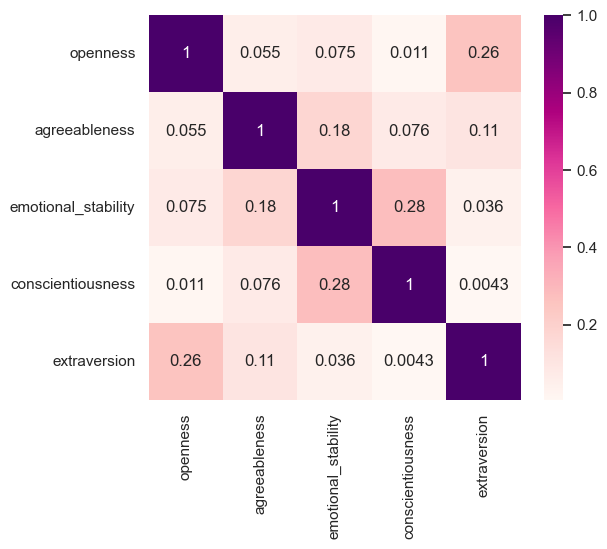

In [9]:
ocean = ['openness','agreeableness','emotional_stability','conscientiousness','extraversion']
cor_ocean = personality_data[ocean].corr()
plt.rcParams['figure.figsize']=(6,5)
sns.heatmap(cor_ocean,annot=True, cmap=plt.cm.RdPu)
plt.show()

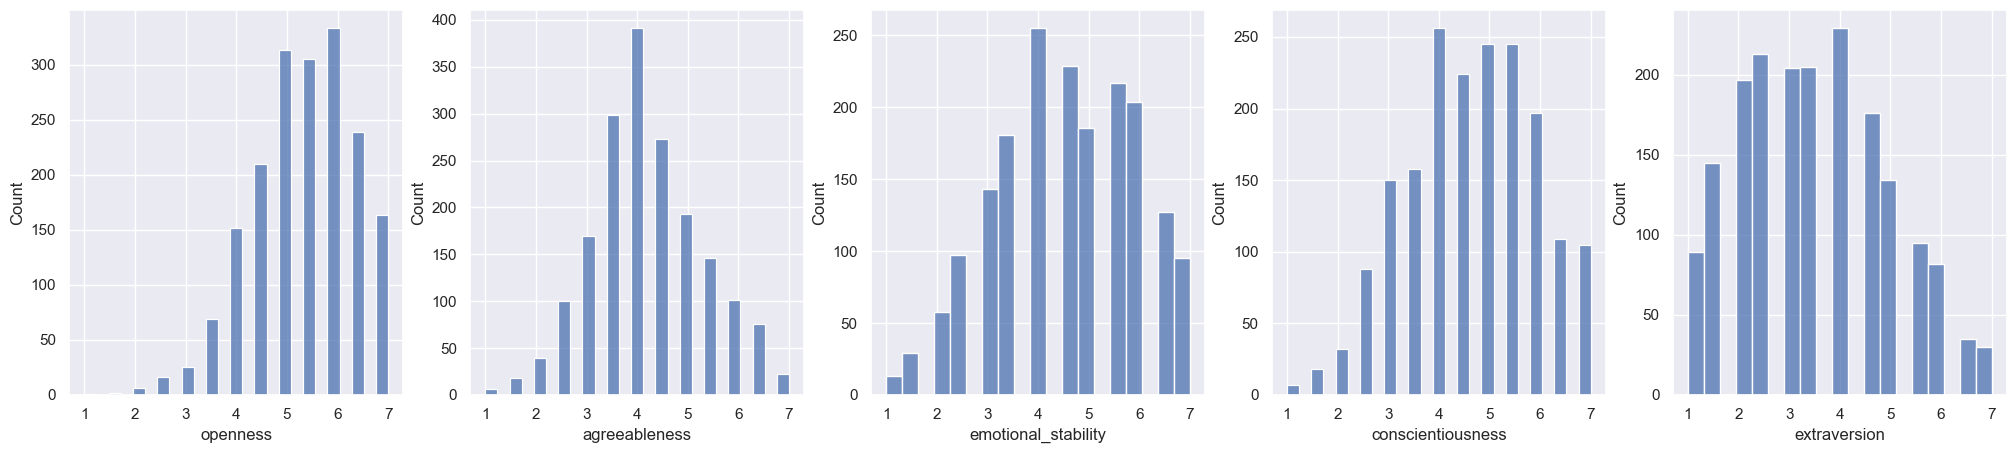

In [10]:
fig, axes = plt.subplots(1,5, figsize=(25,5))
sns.histplot(personality_data,x='openness',ax=axes[0])
sns.histplot(personality_data,x='agreeableness',ax=axes[1])
sns.histplot(personality_data,x='emotional_stability',ax=axes[2])
sns.histplot(personality_data,x='conscientiousness',ax=axes[3])
sns.histplot(personality_data,x='extraversion',ax=axes[4])
plt.show()

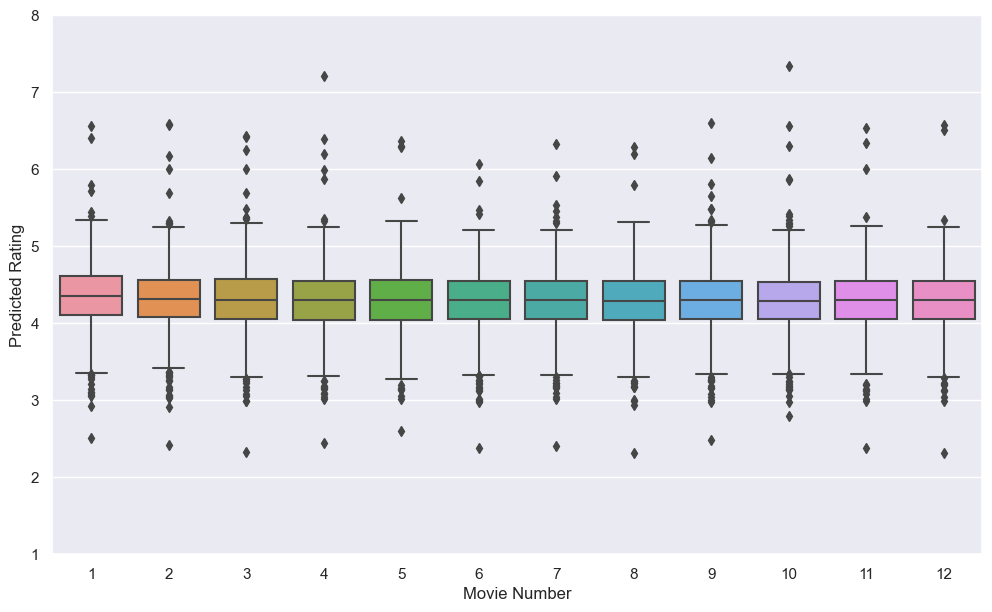

In [11]:
pred_ratings=[]
nums=[]
for x in range (1,13):
    pred_ratings.append(f"predicted_rating_{x}")
    nums.append(f"{x}")
plt.subplots(figsize=(12,7))
ax = sns.boxplot(data=personality_data[pred_ratings])
ax.set_xticklabels(nums)
ax.set_xlabel("Movie Number")
ax.set_ylabel("Predicted Rating")
ax.set(ylim=(1,8))
plt.show()

In [12]:
personality_data.groupby(['assigned metric']).size()

assigned metric
 all            208
 diversity      520
 popularity     574
 serendipity    532
dtype: int64

In [13]:
print(personality_data['assigned metric'].value_counts())
print(personality_data['assigned condition'].value_counts())

 popularity     574
 serendipity    532
 diversity      520
 all            208
Name: assigned metric, dtype: int64
 high       554
 medium     538
 low        534
 default    208
Name: assigned condition, dtype: int64


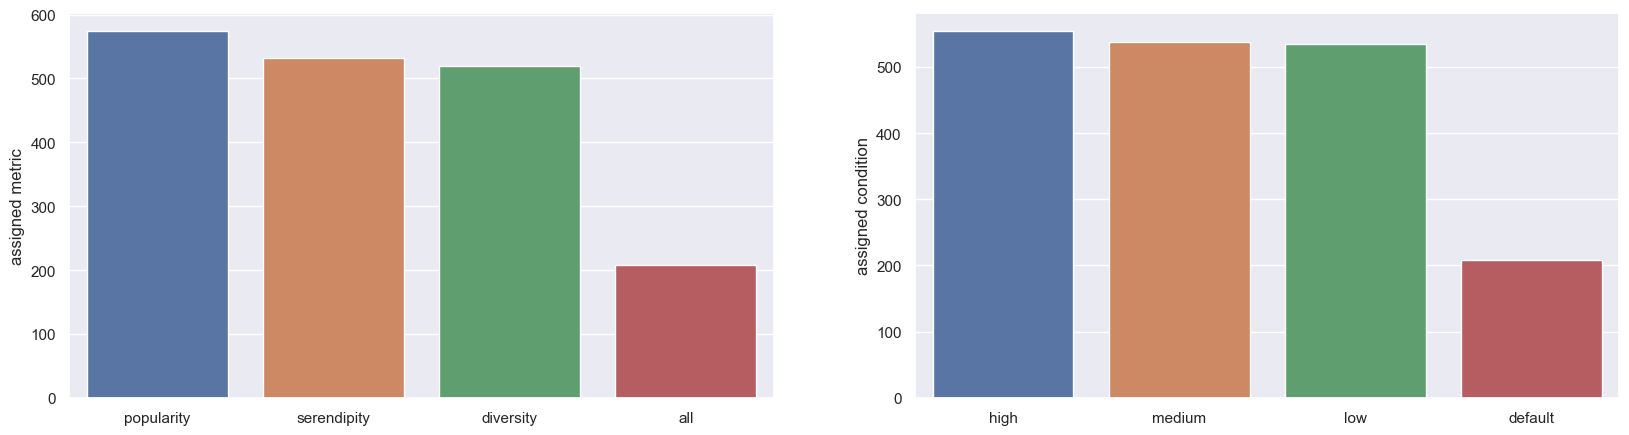

In [14]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.barplot(data=personality_data,x=['popularity','serendipity','diversity','all'],y=personality_data['assigned metric'].value_counts(),ax=axes[0])
sns.barplot(data=personality_data,x=['high','medium','low','default'],y=personality_data['assigned condition'].value_counts(),ax=axes[1])
plt.show()

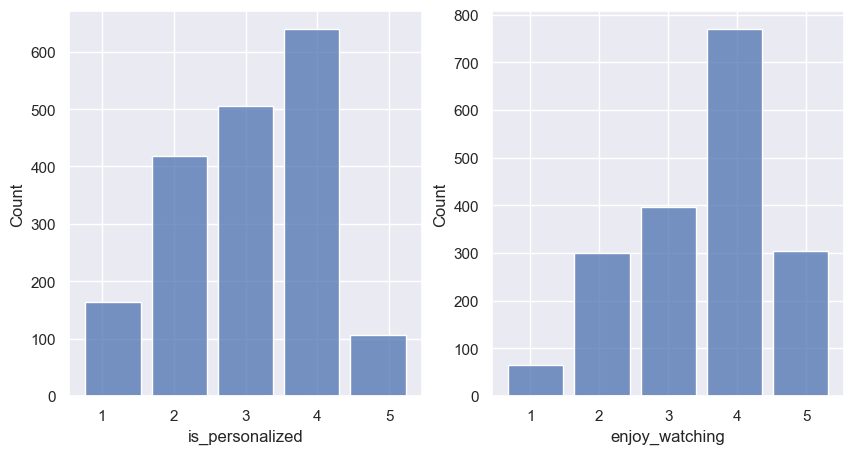

In [15]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.histplot(personality_data,x='is_personalized',ax=axes[0],shrink=2.5)
sns.histplot(personality_data,x='enjoy_watching',ax=axes[1],shrink=5)
plt.show()

In [16]:
len(personality_data.loc[personality_data['assigned metric'] == ' all'].loc[personality_data['assigned condition']==' default'])

208

## TODO pitati profesora sta da radimo sa pred ratings
## TODO sta da radimo sa kontrolnim vrednostima (all, default)